In [2]:

import pandas as pd
import numpy as np
import os
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from matplotlib import pyplot as plt
from statsmodels.tsa.arima_model import ARIMA




In [3]:
def read_data():
    data_lst = []

    for info in os.listdir("train_data"): 

        if info == ".DS_Store":
            continue
        domain = os.path.abspath(r"train_data")
        dirc = os.path.join(domain,info)
        data = pd.read_csv(dirc)
        
        data_lst.append([data, info])
    return data_lst

data_lst = read_data()


In [4]:
df = pd.read_csv("train_data/alcoholSubstanceAbuse.csv")
df["Period"] = pd.to_datetime(df["Period"], format = "%Y")
df = df.set_index("Period")
df.head(10)
temp = df[df["Location"] == "Albania"]
temp = temp.groupby("Period").mean()
temp.head(10)



,First Tooltip
Period,
2000-01-01,6.556667
2005-01-01,7.673333
2010-01-01,7.713333
2015-01-01,6.730000
2018-01-01,7.160000


In [ ]:
#datatime from 2015-2021

lst = [i for i in range(2000,2022)]
t = pd.DataFrame({'Period':lst})
t["Period"] = pd.to_datetime(t["Period"], format = "%Y")
t = t.set_index("Period")

ARIMA

/Users/zxg/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


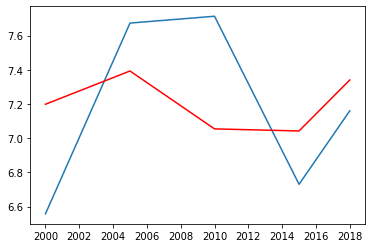

In [6]:
y = temp['First Tooltip']
model = ARIMA(y, order=(1, 0, 0))
results_AR = model.fit(disp=-1)
plt.plot(y)
plt.plot(results_AR.fittedvalues, color='red')
plt.show()

In [7]:
results_AR.forecast(10)[0]

array([7.20994609, 7.19479388, 7.19939062, 7.1979961 , 7.19841916,
       7.19829082, 7.19832975, 7.19831794, 7.19832152, 7.19832044])

In [15]:

start_index = '2000-01-01'
end_index = '2015-01-01'
results_AR.forecast(10)
results_AR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          First Tooltip   No. Observations:                    5
Model:                     ARMA(1, 0)   Log Likelihood                  -3.161
Method:                       css-mle   S.D. of innovations              0.451
Date:                Sun, 03 Apr 2022   AIC                             12.322
Time:                        15:09:10   BIC                             11.150
Sample:                             0   HQIC                             9.177
                                                                              
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   7.1983      0.168     42.911      0.000       6.870       7.527
ar.L1.First Tooltip    -0.3034      0.473     -0.642      0.521      -1.230       0.623
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -3.2963           +0.0000j            3.2963            0.5000
-----------------------------------------------------------------------------
"""

Decomposition

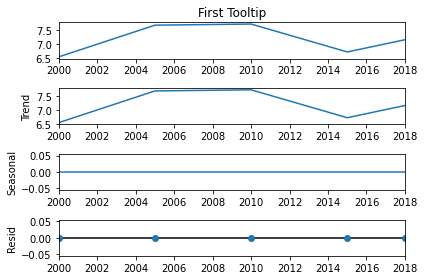

In [16]:
decomposition = sm.tsa.seasonal_decompose(y, model='additive', period = 1)
fig = decomposition.plot()
plt.show()

In [6]:
data_lst[0]

[         Location  Period                                          Indicator  \
 0     Afghanistan    2018  Total (recorded+unrecorded) alcohol per capita...   
 1     Afghanistan    2018  Total (recorded+unrecorded) alcohol per capita...   
 2     Afghanistan    2018  Total (recorded+unrecorded) alcohol per capita...   
 3     Afghanistan    2015  Total (recorded+unrecorded) alcohol per capita...   
 4     Afghanistan    2015  Total (recorded+unrecorded) alcohol per capita...   
 ...           ...     ...                                                ...   
 2782     Zimbabwe    2005  Total (recorded+unrecorded) alcohol per capita...   
 2783     Zimbabwe    2005  Total (recorded+unrecorded) alcohol per capita...   
 2784     Zimbabwe    2000  Total (recorded+unrecorded) alcohol per capita...   
 2785     Zimbabwe    2000  Total (recorded+unrecorded) alcohol per capita...   
 2786     Zimbabwe    2000  Total (recorded+unrecorded) alcohol per capita...   
 
             Dim1  First T